<a href="https://colab.research.google.com/github/vasanthi200221/classroompractice/blob/main/simple_linear_regresssion_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# simple linear regression assignment

Question 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset=pd.read_csv("delivery_time.csv")
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
dataset.shape

(21, 2)

In [ ]:
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
#Renaming all columns
dataset = dataset.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'}, axis=1)

In [ ]:
dataset

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
dataset.tail()

,Delivery_Time,Sorting_Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [ ]:
dataset.dtypes

Delivery_Time    float64
Sorting_Time       int64
dtype: object

In [ ]:
#check for missing values
dataset.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [ ]:
#to check for duplicate rows
dataset[dataset.duplicated()]


,Delivery_Time,Sorting_Time


In [ ]:
#to check for duplicate rows
dataset[dataset.duplicated()].shape


(0, 2)

In [ ]:
dataset.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<Axes: >

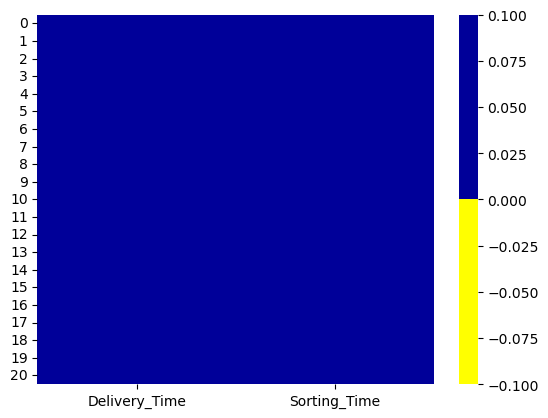

In [ ]:
#to genrate heat map
cols = dataset.columns
colors = [ '#ffff00','#000099']   #define colors, yellow for missing, blue for non missing
sns.heatmap(dataset[cols].isnull(),
               cmap= sns.color_palette(colors))

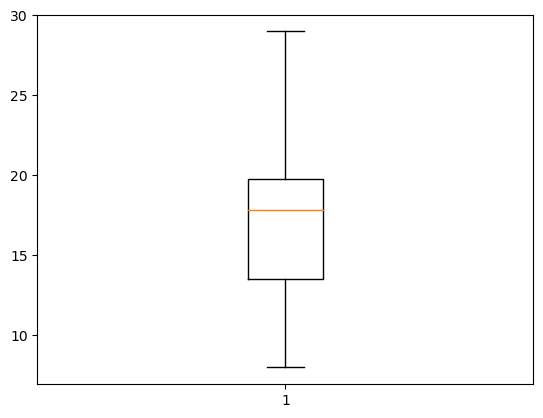

In [ ]:
#Outlier Detection
plt.boxplot(dataset['Delivery_Time'])
plt.show()

<Axes: xlabel='Delivery_Time', ylabel='Density'>

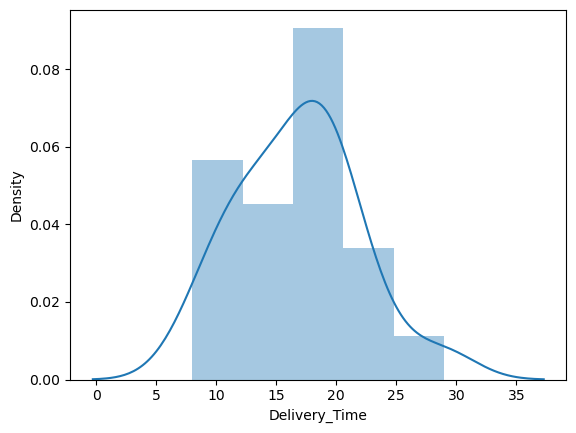

In [ ]:
sns.distplot(dataset.Delivery_Time)

{'whiskers': [<matplotlib.lines.Line2D at 0x220cec26200>,
 'caps': [<matplotlib.lines.Line2D at 0x220cec26740>,
 'boxes': [<matplotlib.lines.Line2D at 0x220cec25f60>],
 'medians': [<matplotlib.lines.Line2D at 0x220cec26c80>],
 'fliers': [<matplotlib.lines.Line2D at 0x220cec26f20>],
 'means': []}

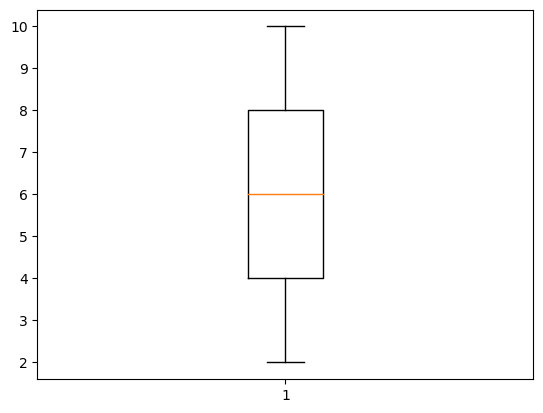

In [ ]:
plt.boxplot(dataset['Sorting_Time'])


<Axes: xlabel='Sorting_Time', ylabel='Density'>

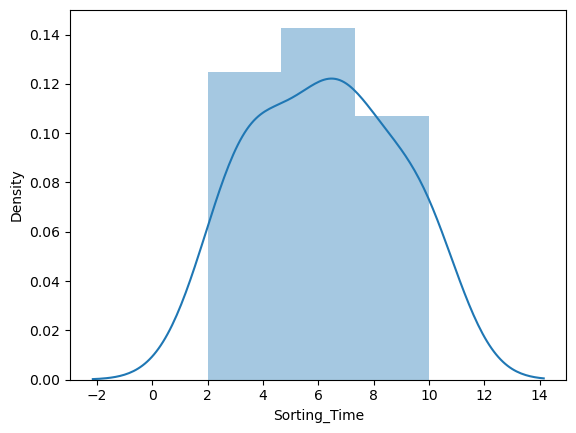

In [ ]:
sns.distplot(dataset.Sorting_Time)

In [ ]:
dataset.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


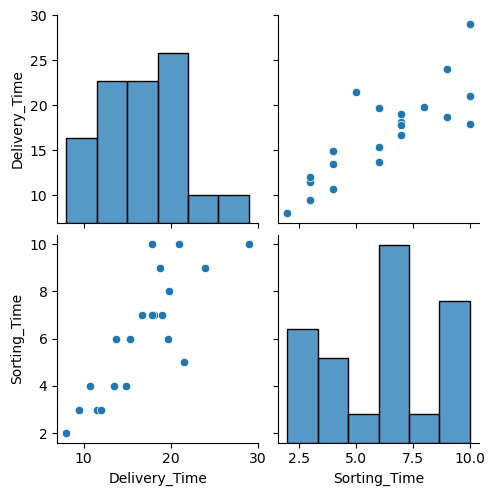

In [ ]:
sns.pairplot(dataset)

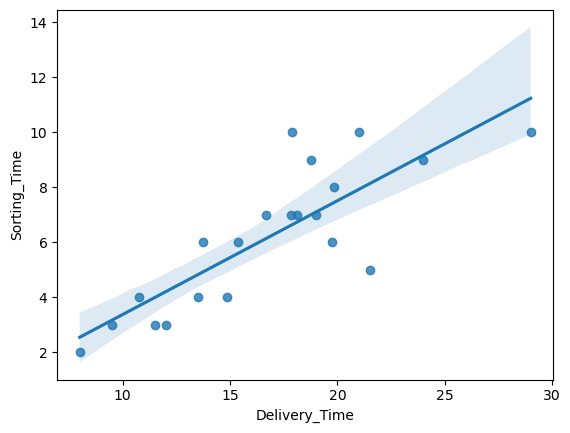

In [ ]:
sns.regplot(x=dataset["Delivery_Time"],y=dataset["Sorting_Time"])
plt.show()

In [ ]:
model1=smf.ols("Delivery_Time~Sorting_Time",data=dataset).fit()

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           3.98e-06
Time:                        18:53:14   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model1.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [ ]:
model1.pvalues

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64

In [ ]:
model1.tvalues

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64

In [ ]:
model1.rsquared,model1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [ ]:
model1.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [ ]:
model.resid_pearson

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [ ]:
newdata1 = pd.Series([5,10])

In [ ]:
data_pred1 = pd.DataFrame(newdata1, columns = ['Sorting_Time'])

In [ ]:
data_pred1

,Sorting_Time
0,5
1,10


In [ ]:
pred1=model1.predict(data_pred1)
pred1

0    14.827833
1    23.072933
dtype: float64

In [ ]:
pred1.corr(dataset.Delivery_Time)

-1.0

In [ ]:
perd1_1=model1.predict(dataset.Sorting_Time)
perd1_1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [ ]:
# log method
model2 = smf.ols('Delivery_Time~np.log(Sorting_Time)',data=dataset).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           2.64e-06
Time:                        18:53:15   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred2=model2.predict(data_pred1)
pred2

0    15.714496
1    21.982913
dtype: float64

In [ ]:
pred2.corr(dataset.Delivery_Time)

-0.9999999999999998

In [ ]:
perd2_1=model2.predict(dataset.Sorting_Time)
perd2_1

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [ ]:
# Exponential method
model3 = smf.ols('np.log(Delivery_Time)~Sorting_Time',data=dataset).fit()

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Wed, 09 Aug 2023   Prob (F-statistic):           1.59e-06
Time:                           18:53:15   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred_log=model3.predict(data_pred1)
pred_log

0    2.649130
1    3.176888
dtype: float64

In [ ]:
pred3=np.exp(pred_log)
pred3

0    14.141728
1    23.972032
dtype: float64

In [ ]:
pred3.corr(dataset.Delivery_Time)

-1.0

In [ ]:
perd_log1=model3.predict(dataset.Sorting_Time)
perd_log1

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [ ]:
pred3_1=np.exp(perd_log1)
pred3_1

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [ ]:
# quadratic method

In [ ]:
dataset["Sorting_Time_sq"]=dataset.Sorting_Time*dataset.Sorting_Time
dataset

,Delivery_Time,Sorting_Time,Sorting_Time_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [ ]:
model4=smf.ols("np.log(Delivery_Time)~Sorting_Time+Sorting_Time_sq",data=dataset).fit()

In [ ]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Wed, 09 Aug 2023   Prob (F-statistic):           2.20e-06
Time:                           18:53:15   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_Time        0.2659      0.080      3.315      0.004       0.097       0.434
Sorting_Time_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred_quad=model4.predict(dataset)
pred_quad

0     3.074863
1     2.557942
2     2.832974
3     3.052913
4     3.074863
5     2.832974
6     2.931968
7     2.381905
8     3.074863
9     3.052913
10    3.005281
11    2.557942
12    2.931968
13    2.381905
14    2.381905
15    2.557942
16    2.832974
17    2.931968
18    2.180186
19    2.931968
20    2.708299
dtype: float64

In [ ]:
pred4=np.exp(pred_quad)  # as we have used log(AT) in preparing model so we need to convert it back
pred4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [ ]:
pred4.corr(dataset.Delivery_Time)

0.8258882749910925

In [ ]:
rmse1=np.sqrt(np.mean(np.array(dataset.Delivery_Time)-np.array(pred4)**2))
rmse1

nan

In [ ]:
model4.resid

0    -0.030341
1     0.044747
2     0.150179
3     0.125141
4     0.292433
5    -0.101859
6     0.012471
7    -0.130613
8    -0.190063
9    -0.121719
10   -0.018085
11   -0.183037
12   -0.117758
13    0.060442
14    0.105499
15    0.142076
16   -0.211935
17   -0.035504
18   -0.100744
19   -0.051086
20    0.359754
dtype: float64

In [ ]:
model4.resid_pearson

array([-0.18653701,  0.27510944,  0.92331151,  0.76937448,  1.79789238,
       -0.62623272,  0.0766711 , -0.80301506, -1.16851536, -0.74833548,
       -0.11118848, -1.12531927, -0.72398172,  0.37160353,  0.64861345,
        0.8734897 , -1.3029903 , -0.21828016, -0.61938087, -0.31407821,
        2.21178906])

In [ ]:
model4.resid_pearson.mean()

1.6896537079533336e-14

In [ ]:
model4.resid_pearson.std()

0.9258200997725514

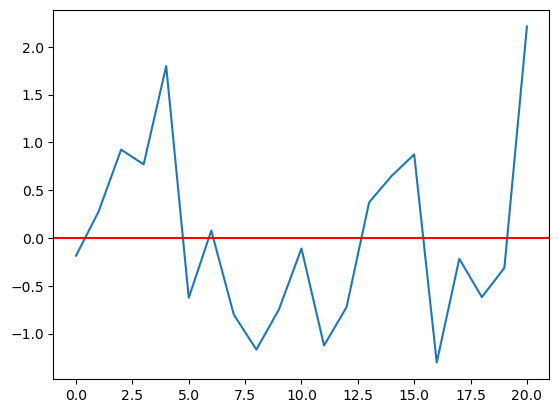

In [ ]:
plt.plot(model4.resid_pearson)
plt.axhline(y=0,color='red')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
data=pd.read_csv("Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [ ]:
data.shape

(30, 2)

In [ ]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
data[data.duplicated()]

,YearsExperience,Salary


In [ ]:
data[data.duplicated()].shape

(0, 2)

<Axes: >

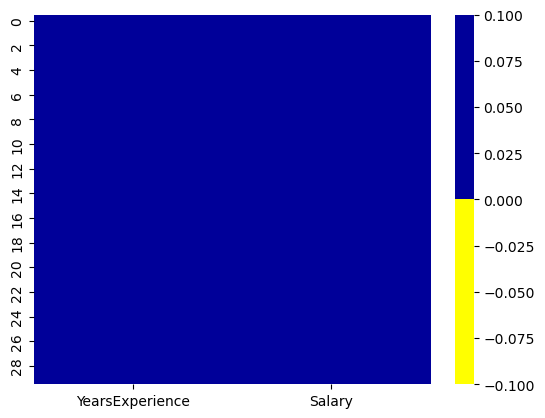

In [ ]:
#to genrate heat map
cols = data.columns
colors = [ '#ffff00','#000099']   #define colors, yellow for missing, blue for non missing
sns.heatmap(data[cols].isnull(),
               cmap= sns.color_palette(colors))

In [ ]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


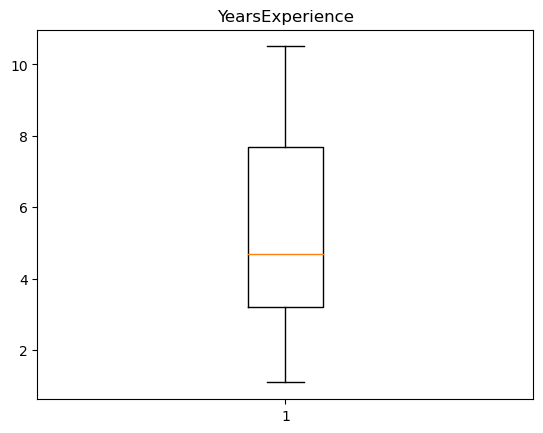

In [ ]:
plt.boxplot(data['YearsExperience'])
plt.title("YearsExperience")
plt.show()

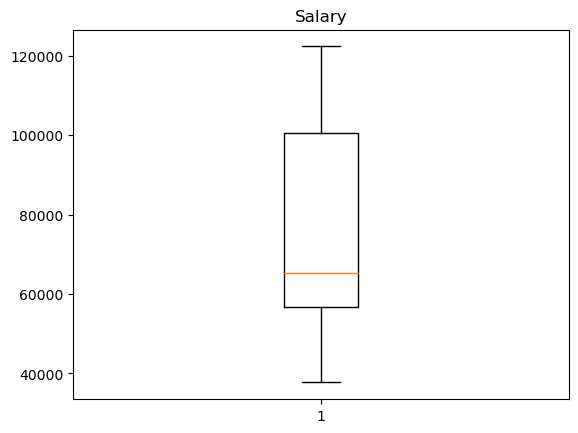

In [ ]:
plt.boxplot(data['Salary'])
plt.title("Salary")
plt.show()

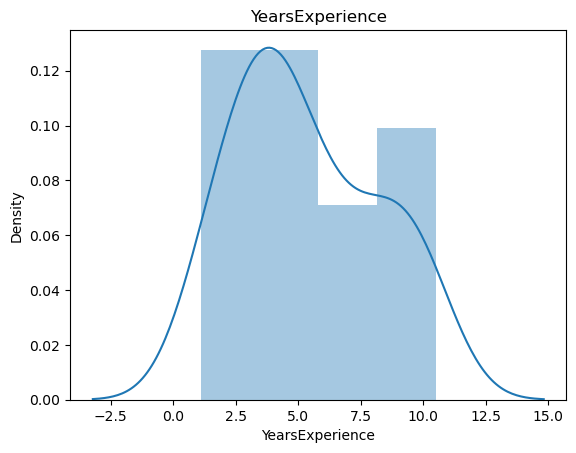

In [ ]:
sns.distplot(data.YearsExperience)
plt.title("YearsExperience")
plt.show()

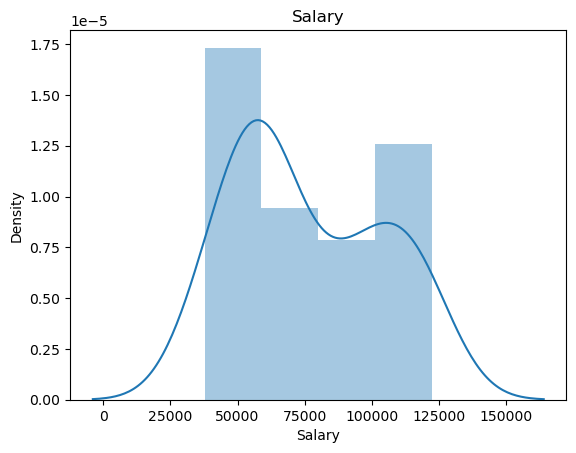

In [ ]:
sns.distplot(data.Salary)
plt.title("Salary")
plt.show()

In [ ]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


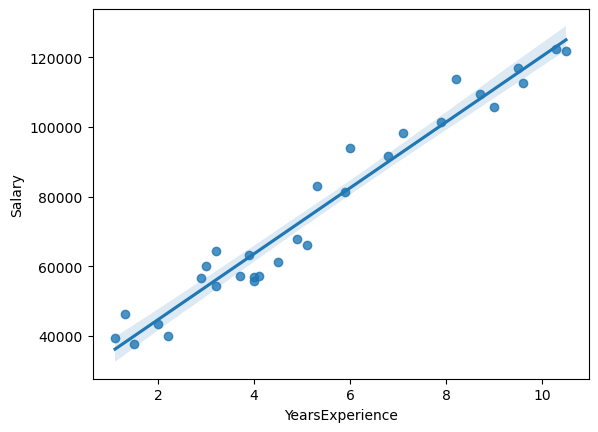

In [ ]:
sns.regplot(x=data["YearsExperience"],y=data["Salary"])
plt.show()

In [ ]:
model=smf.ols("Salary~YearsExperience",data=data).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           1.14e-20
Time:                        18:53:17   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Finding Cefficient Parameters

In [ ]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
# Finding Pvalues and tvalues

In [ ]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [ ]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [ ]:
# Finding Rsquared values

In [ ]:
model.rsquared ,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [ ]:
salary=(25792.200199)+(9449.962321)*3
salary

54142.087162

In [ ]:
new_data=pd.Series([1,2,3,4,5])
new_data

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data,columns=["YearsExperience"])
data_pred

,YearsExperience
0,1
1,2
2,3
3,4
4,5


In [ ]:
model.predict(data_pred)

0    35242.162520
1    44692.124842
2    54142.087163
3    63592.049484
4    73042.011806
dtype: float64

In [ ]:
rmse=np.sqrt(np.mean(np.array(data.Salary)-np.array(data_pred)**2))
rmse

275.66646513495255

In [ ]:
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [ ]:
model.resid_pearson

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [ ]:
model.resid_pearson.mean()

-7.105427357601002e-16

In [ ]:
model.resid_pearson.std()

0.9660917830792959

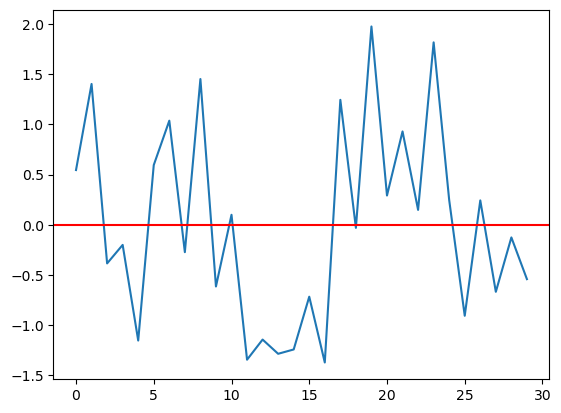

In [ ]:
plt.plot(model.resid_pearson)
plt.axhline(y=0,color='red')
plt.show()